In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
hotels = pd.read_excel("../Data/HotelCustomersDataset.xlsx")

hotels["date"] =  (pd.to_datetime("2018-12-31")
                   - pd.to_timedelta(hotels["DaysSinceCreation"], unit="D")).astype("datetime64[ns]")

In [3]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,2018-08-03
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01


# Assignment 1: Plotting DataFrames

* Plot the `LodgingRevenue` and `OtherRevenue` columns in a line chart from the `monthly_revenue` DataFrame created below.  
* Make sure your x-axis is the `date` column.

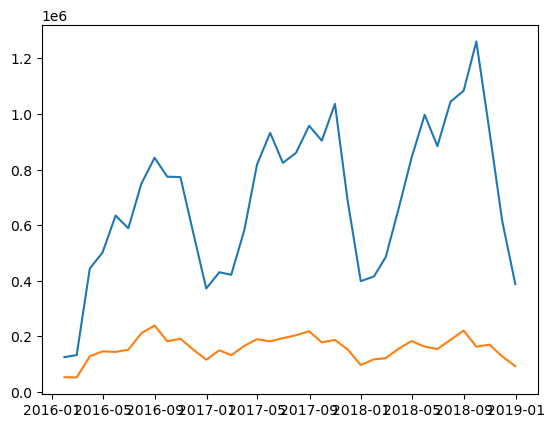

In [4]:
daily_revenue = (
    hotels
    .groupby("date")
    .agg({"LodgingRevenue":"sum", "OtherRevenue":"sum"})
)

monthly_revenue = daily_revenue.resample("M").sum()

fig, ax = plt.subplots()
ax.plot(monthly_revenue)

# Assignment 2: Formatted Line Chart

Plot the monthly sum of `LodgingRevenue` and `OtherRevenue`.

Make sure to add titles and a y-axis label, remove the top and right borders, and add a legend.

Consider modifying the font sizes as well.

Thanks!

In [5]:
daily_revenue = (
    hotels
    .groupby("date")
    .agg({"LodgingRevenue":"sum", "OtherRevenue":"sum"})
)

monthly_revenue = daily_revenue.resample("M").sum()


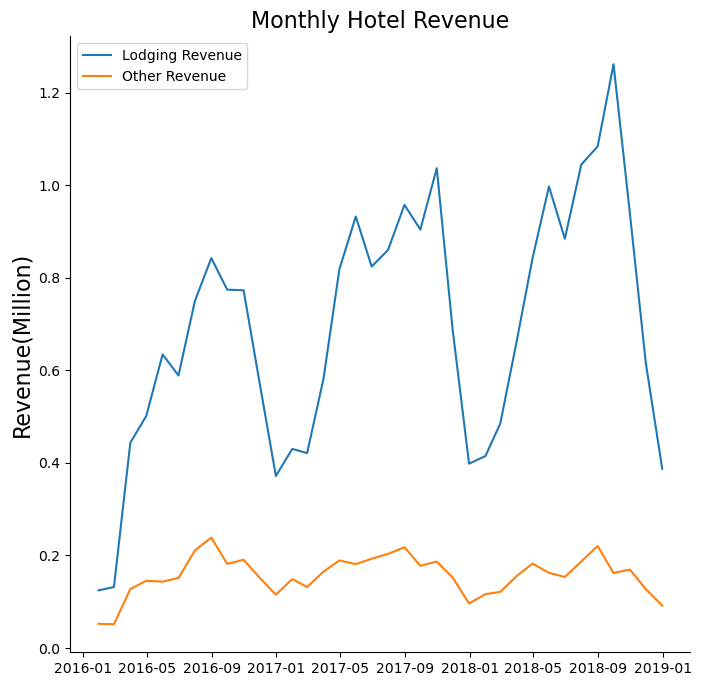

In [6]:
fig, ax = plt.subplots(figsize = (8,8))

ax.set_title('Monthly Hotel Revenue', fontsize = 16)
ax.plot(monthly_revenue.index, monthly_revenue['LodgingRevenue']/1000000, label = 'Lodging Revenue')
ax.plot(monthly_revenue.index, monthly_revenue['OtherRevenue']/1000000, label = 'Other Revenue')
ax.set_ylabel('Revenue(Million)', fontsize = 16)
ax.legend(loc = 'upper left')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

# Assignment 2: Dual Axis Line Chart

* Plot the sum of nights booked and the sum of cancellations on a quarterly basis (resample("Q") will help). 

* Plot them in the same chart but different Y-Axes.

* Make sure to add titles and axis labels, remove scientific notation, and add a legend.

* Consider modifying the font sizes as well.

Thanks!

*Note: I accidentally repeated the assignment numbers, but leaving as is to align with video numbering*

In [7]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,2018-08-03
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01


In [8]:
daily_bookings = (
    hotels
    .groupby('date')
    .agg({'RoomNights': 'sum', 'BookingsCanceled': 'sum'})
)
quarterly_bookings = daily_bookings.resample('Q').sum()

In [9]:
quarterly_bookings.head()

,RoomNights,BookingsCanceled
date,,
2016-03-31,8464,15
2016-06-30,15535,26
2016-09-30,19517,27
2016-12-31,15404,17
2017-03-31,15206,12


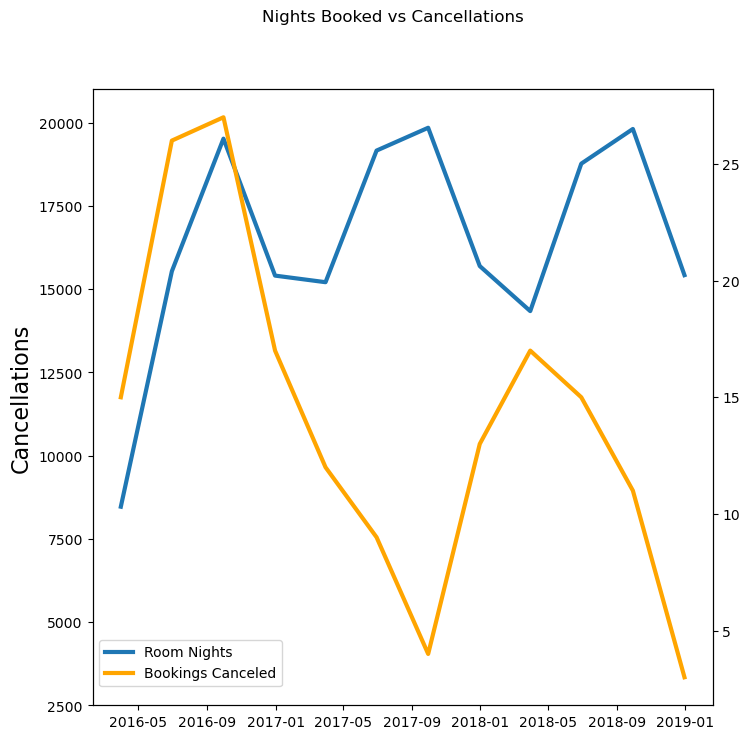

In [84]:
fig, ax = plt.subplots(figsize = (8,8))

ax.plot(
    quarterly_bookings.index,
    quarterly_bookings['RoomNights'],
    label = 'Room Nights',
    linewidth = 3
)
ax.set_ylabel('Room Nights Booked', fontsize = 16)

ax.set_ylim(2500, 21000)
ax2 = ax.twinx()

ax2.plot(
    quarterly_bookings.index,
    quarterly_bookings['BookingsCanceled'],
    label = 'Bookings Canceled',
    c = 'orange',
    linewidth = 3
)
ax.set_ylabel('Cancellations', fontsize = 16)
fig.suptitle('Nights Booked vs Cancellations')
fig.legend(bbox_to_anchor=(0.37,0.2))

# Assignment 3: Bar Chart

* Create a bar chart of total room nights booked by country. Limit your results to the top 10 countries.

* Then, build a horizontal bar chart of lodging revenue by country for the same countries in your room nights chart.

* As always, make sure to add labels to your chart!

In [10]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,2018-08-03
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01


In [21]:
countries = hotels.groupby('Nationality').agg({'RoomNights': 'sum', 'LodgingRevenue': 'sum'})
sorted_RN = countries.sort_values(by = 'RoomNights', ascending = False).head(10)
sorted_LR = countries.sort_values(by = 'LodgingRevenue', ascending = False).head(10)

Text(0, 0.5, 'Room Nights')

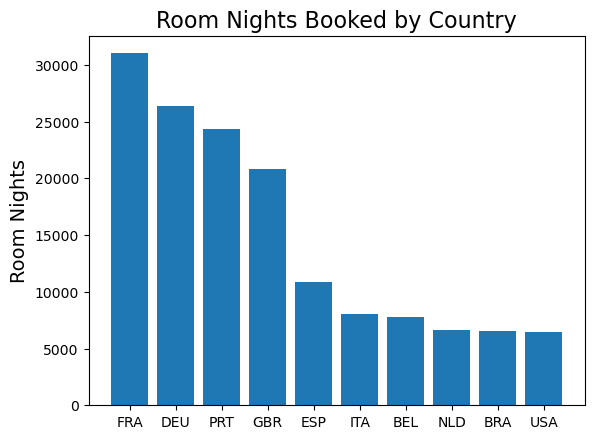

In [33]:
fig, ax = plt.subplots()

ax.bar(
    sorted_RN.index,
    sorted_RN['RoomNights'],
    label = 'Room Nights'
)
ax.set_title('Room Nights Booked by Country', fontsize = 16)
ax.set_ylabel('Room Nights', fontsize = 14)


Text(0.5, 0, 'Revenue(Million)')

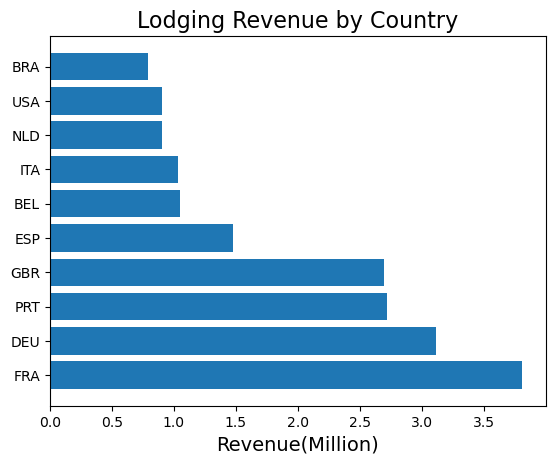

In [36]:
fig, ax = plt.subplots()

ax.barh(
    sorted_LR.index,
    sorted_LR['LodgingRevenue']/1000000,
    label = 'Lodging Revenue'
)
ax.set_title('Lodging Revenue by Country', fontsize = 16)
ax.set_xlabel('Revenue(Million)', fontsize = 14)

# Assignment 4: Advanced Bar Charts

* Build a grouped bar chart of our top 5 countries with LodgingRevenue and OtherRevenue as bars for each.
* Then, build a 100% bar chart stacked bar chart of LodgingRevenue and OtherRevenue. Add a reference line at 80%, which is our baseline. 

Thanks!

In [55]:
countries = ["FRA", "DEU", "PRT", "GBR", "ESP"]

country_subset = hotels.loc[hotels['Nationality']
                            .isin(countries)].groupby('Nationality').agg({'LodgingRevenue': 'sum', 'OtherRevenue': 'sum'})
country_subset.head()

,LodgingRevenue,OtherRevenue
Nationality,,
DEU,3113382.55,725541.53
ESP,1475909.33,319840.82
FRA,3809315.59,1033166.30
GBR,2693123.61,591212.77
PRT,2715008.72,665634.58


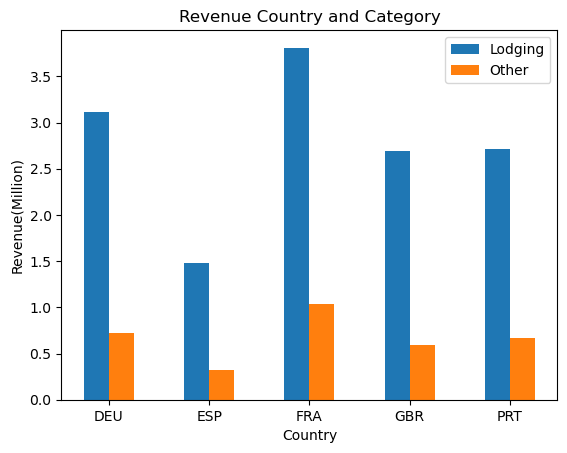

In [60]:
fig ,ax = plt.subplots()

width = .25
x = np.arange(0, len(countries))

ax.bar(
    x-width/2,
    country_subset['LodgingRevenue']/1000000,
    width = width,
    label = 'Lodging'
)

ax.bar(
    x+width/2,
    country_subset['OtherRevenue']/1000000,
    width = width,
    label = 'Other'
)

ax.set_title('Revenue Country and Category')
ax.set_xlabel('Country')
ax.set_ylabel('Revenue(Million)')
ax.set_xticks(x)
ax.set_xticklabels(country_subset.index)

ax.legend()

In [61]:
country_subset = country_subset.apply(lambda x: x*100/sum(x), axis =1)
country_subset

,LodgingRevenue,OtherRevenue
Nationality,,
DEU,81.100394,18.899606
ESP,82.189013,17.810987
FRA,78.664529,21.335471
GBR,81.999019,18.000981
PRT,80.310417,19.689583


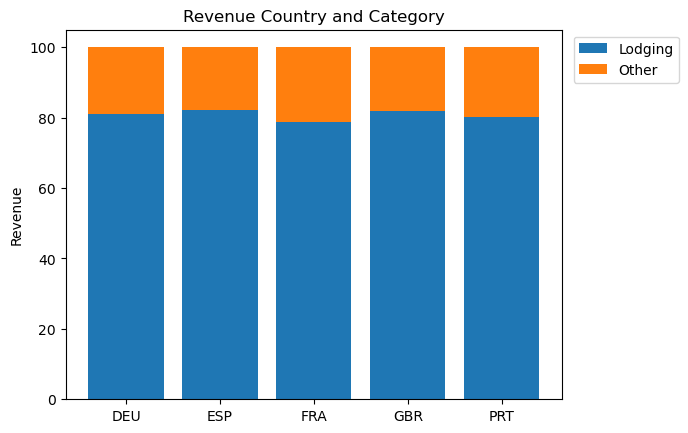

In [66]:
fig, ax = plt.subplots()

ax.bar(
    country_subset.index,
    country_subset['LodgingRevenue'],
    label = 'Lodging'
)

ax.bar(
    country_subset.index,
    country_subset['OtherRevenue'],
    label = 'Other',
    bottom = country_subset['LodgingRevenue']
)

ax.set_title('Revenue Country and Category')
ax.set_ylabel('Revenue')
ax.legend(bbox_to_anchor = (1.25,1))

# Assignment 5: Pie Charts

* Build a pie chart of LodgingRevenue by country. Include a slice for our top 5 countries and combine the rest into an 'other' Category.
* Then, convert the pie chart into a donut chart.

In [99]:
country_rev = hotels.groupby('Nationality')[['LodgingRevenue']].sum().sort_values('LodgingRevenue', ascending = False)
other_country = country_rev[5:].sum()
other_country.name = 'Other'
country_rev = country_rev.head(5)
country_rev = country_rev.append(other_country)
country_rev = country_rev.reset_index()
country_rev

C:\Users\bangg\AppData\Local\Temp\ipykernel_884\1751023931.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  country_rev = country_rev.append(other_country)


,Nationality,LodgingRevenue
0,FRA,3809315.59
1,DEU,3113382.55
2,PRT,2715008.72
3,GBR,2693123.61
4,ESP,1475909.33
5,Other,11170126.66


Text(0.5, 1.0, 'Percent Revenue by Country')

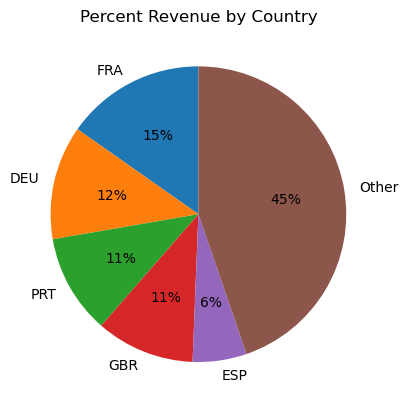

In [100]:
fig, ax = plt.subplots()

ax.pie(
    x = country_rev['LodgingRevenue'],
    startangle = 90,
    labels = country_rev['Nationality'],
    autopct = '%0.f%%'
)

ax.set_title('Percent Revenue by Country')

Text(0.5, 1.0, 'Percent Revenue by Country')

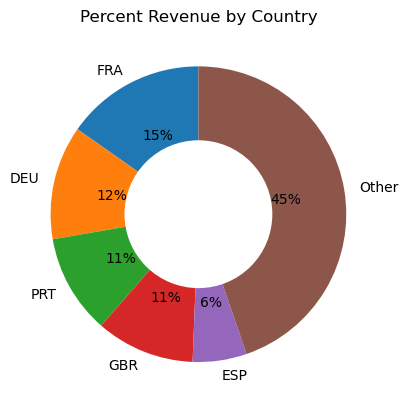

In [103]:
fig, ax = plt.subplots()

ax.pie(
    x = country_rev['LodgingRevenue'],
    startangle = 90,
    labels = country_rev['Nationality'],
    autopct = '%0.f%%'
)

donut = plt.Circle((0, 0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(donut)

ax.set_title('Percent Revenue by Country')

# Assignment 6: Scatterplots & Histograms

* Build a scatterplot comparing average nights stayed by country to average revenue per customer by country.
* Then, build a bubble chart by specifying the size of the bubbles as the average nightly revenue.
* Finally, build a histogram comparing customer age in Germany to the Customer age in france. Make sure to tweak your alpha!

Column Creation Code:

<mark style="background-color: black">
    hotels.assign(total_revenue = hotels["LodgingRevenue"] + hotels["OtherRevenue"],
                      revenue_per_night = lambda x: x["total_revenue"] / x["RoomNights"])</mark>


Thanks!

In [113]:
hotels = hotels.assign(total_revenue = hotels["LodgingRevenue"] + hotels["OtherRevenue"], revenue_per_night = lambda x: x["total_revenue"] / x["RoomNights"])
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date,total_revenue,revenue_per_night,avg_RN,avg_rev_person
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,2018-08-03,476.3,95.26,NaN,NaN
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,2016-01-01,333.0,66.60,NaN,476.3
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,2016-01-01,0.0,NaN,NaN,333.0
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,2016-01-01,300.0,60.00,NaN,0.0
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,2016-01-01,0.0,NaN,NaN,300.0


In [115]:
agg_hotels = hotels.groupby('Nationality').agg(
    total_revenue = ('total_revenue', 'sum'),
    avg_revenue = ('total_revenue', 'mean'),
    avg_age = ('Age', 'mean'),
    avg_night = ('RoomNights', 'mean'),
    avg_nightly_rev = ('revenue_per_night', 'mean')
)

agg_hotels

,total_revenue,avg_revenue,avg_age,avg_night,avg_nightly_rev
Nationality,,,,,
ABW,2153.22,717.740000,42.666667,3.666667,204.421111
AGO,115174.49,632.826868,41.681319,3.461538,177.745487
AIA,1290.10,430.033333,25.666667,1.666667,232.737500
ALB,4267.88,328.298462,35.153846,2.846154,118.783788
AND,3760.25,537.178571,43.285714,2.000000,283.452381
...,...,...,...,...,...
WLF,137.20,68.600000,32.000000,0.500000,137.200000
WSM,342.00,342.000000,32.000000,2.000000,171.000000
YEM,0.00,0.000000,23.000000,0.000000,NaN


Text(0, 0.5, 'Avg. Nights Stayed')

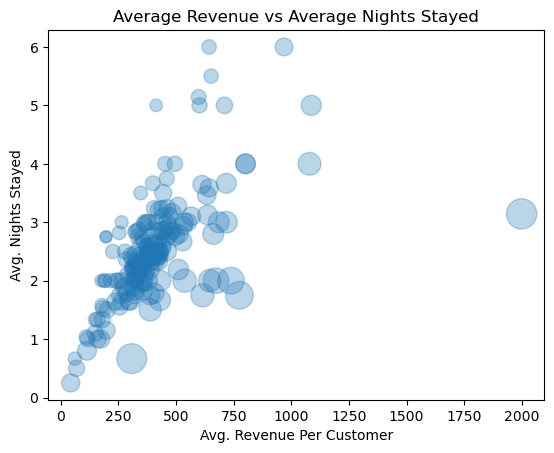

In [125]:
fig, ax = plt.subplots()

ax.scatter(
    agg_hotels['avg_revenue'],
    agg_hotels['avg_night'],
    s = agg_hotels['avg_nightly_rev'],
    alpha = .3
    
)

ax.set_title('Average Revenue vs Average Nights Stayed')
ax.set_xlabel('Avg. Revenue Per Customer')
ax.set_ylabel('Avg. Nights Stayed')

In [174]:
subset = ['DEU', 'FRA']
DEU_FRA = hotels.loc[hotels['Nationality'].isin(subset)]
DEU_FRA = DEU_FRA.groupby(['Nationality', 'Age']).agg(count=('Age', 'count')).reset_index()
DEU_FRA.head(15)

,Nationality,Age,count
0,DEU,-11.0,1
1,DEU,-10.0,2
2,DEU,-7.0,1
3,DEU,0.0,4
4,DEU,1.0,11
5,DEU,2.0,10
6,DEU,3.0,7
7,DEU,4.0,8
8,DEU,5.0,18
9,DEU,6.0,15


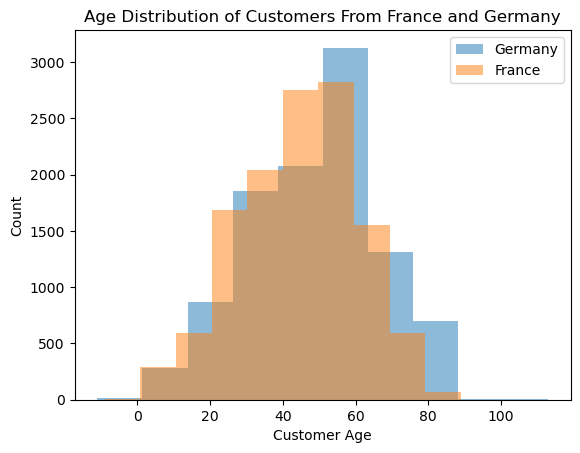

In [179]:
fig, ax = plt.subplots()

ax.hist(
    hotels.loc[hotels['Nationality'] == 'DEU', 'Age'],
    alpha = .5,
    label = 'Germany'
)

ax.hist(
    hotels.loc[hotels['Nationality'] == 'FRA', 'Age'],
    alpha = .5,
    label = 'France'
)

ax.set_title('Age Distribution of Customers From France and Germany')
ax.set_ylabel('Count')
ax.set_xlabel('Customer Age')
ax.legend()